In [8]:
import trimesh
import igl
from meshplot import plot
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mesh = trimesh.load_mesh('bunny.mesh')

In [6]:
mesh.vertices.shape

(3485, 3)

In [7]:
points = mesh.vertices

In [9]:
seed_idx = int(np.random.rand() * len(points) * 0.8)
points_removed = points[seed_idx:]
points_selected = points[:seed_idx]

In [10]:
plot(points_removed)

/home/thor/anaconda3/envs/iglenv/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [11]:
plot(points_selected)

/home/thor/anaconda3/envs/iglenv/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.015585…

In [12]:
## removal w.r.t cutting plane

In [24]:
points = mesh.vertices
points = (points - points.min()) / points.max() - points.min()

In [25]:
plot(points)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5105168…

In [52]:
done = False
while not done:
    plane_normal = np.random.randn(3)
    plane_origin = np.random.randn(3)

    pos_points = []

    neg_points = []
    for point in points:
        signed_distance = np.dot(plane_normal, point - plane_origin)
        if signed_distance < 0:
            neg_points.append(point)
        else:
            pos_points.append(point)

    if len(neg_points) <= 0.3 * len(points) and len(neg_points)> 0.2 * len(points):
        done = True
    else:
        done = False
neg_points = np.array(neg_points)
pos_points = np.array(pos_points)

In [47]:
np.array(pos_points).shape, np.array(neg_points).shape

((2755, 3), (730, 3))

In [50]:
import matplotlib.pyplot as plt

In [56]:
!pwd

/home/thor/IIITDPHD/graphics/SummerSchool2021


In [54]:
%matplotlib notebook

<IPython.core.display.Javascript object>


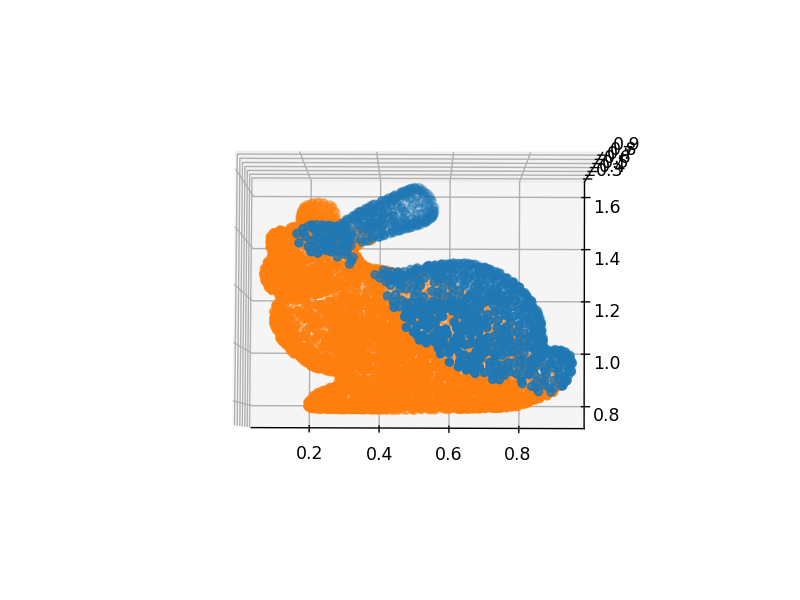

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(neg_points[:,0], neg_points[:, 1], neg_points[:, 2])
ax.scatter3D(pos_points[:, 0], pos_points[:, 1], pos_points[:, 2])

In [49]:
# m = plot(np.array(neg_points))
# m.add_points(np.array(pos_points))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5730547…

# Slice Mesh 

In [5]:
import trimesh
import numpy as np

In [63]:
mesh = trimesh.load('./bunny.obj')

In [4]:
mesh.show()

In [82]:
plane_normal = np.random.randn(3)
plane_origin = mesh.vertices.mean(0)

mesh.vertices.min(), mesh.vertices.max()

(TrackedArray(0.), TrackedArray(1.))

In [83]:
mesh.vertices = (mesh.vertices - mesh.vertices.min(0))/(mesh.vertices.max(0) - mesh.vertices.min(0))

In [87]:
mesh_pos = trimesh.intersections.slice_mesh_plane(mesh, plane_normal, plane_origin )
mesh_neg = trimesh.intersections.slice_mesh_plane(mesh, -plane_normal, plane_origin )

In [88]:
mesh_pos.vertices.shape

(16831, 3)

In [89]:
mesh_pos.show()

In [90]:
mesh_neg.show()

In [94]:
import random

In [97]:
def split_mesh(mesh):
    mesh_points = mesh.vertices
    plane_origin_ = np.mean(mesh_points, 0)
    idx1 = random.randint(0, mesh_points.shape[0]-1)
    idx2 = random.randint(0, mesh_points.shape[0]-1)
    v1 = mesh_points[idx1]
    v2 = mesh_points[idx2]
    v_1 = (v1 - v2)/ np.linalg.norm(v1 - v2)
    idx1 = random.randint(0, mesh_points.shape[0]-1)
    idx2 = random.randint(0, mesh_points.shape[0]-1)
    v1 = mesh_points[idx1]
    v2 = mesh_points[idx2]
    v_2 = (v1- v2 )/ np.linalg.norm(v1 - v2)
    plane_normal_ = np.cross(v_1, v_2)
#             plane_origin_ = mesh.vertices[random.randint(0, len(mesh.vertices)-1)]

    mesh_pos = trimesh.intersections.slice_mesh_plane(mesh, plane_normal_, plane_origin_)
    mesh_neg = trimesh.intersections.slice_mesh_plane(mesh, -plane_normal_, plane_origin_)
    return mesh_pos, mesh_neg

In [98]:
pos_mesh, neg_mesh = split_mesh(mesh)

In [100]:
pos_mesh.show()


In [101]:
neg_mesh.show()

In [102]:

num_patches = 5


patches = [mesh]


while  len(patches)!=num_patches:
    mesh = patches.pop()
    p_, n_ = split_mesh(mesh)
    print('split done')
#     verts, faces  = get_verts_faces(p_)
#     p_ = trimesh.Trimesh(verts, faces)
#     verts, faces = get_verts_faces(n_)
#     n_ = trimesh.Trimesh(verts, faces)

    patches.insert(0, p_)
    patches.insert(0, n_)

split done
split done
split done
split done


In [107]:
import matplotlib.pyplot as plt

In [110]:
%matplotlib notebook

<IPython.core.display.Javascript object>


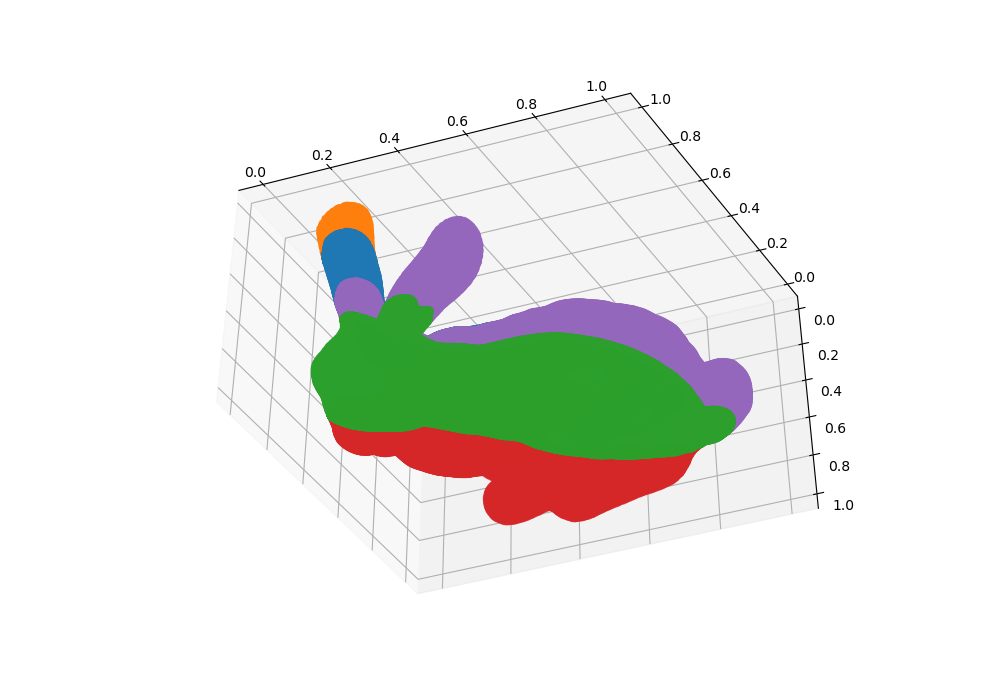

In [111]:

sum_ = 0
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

for patch in patches:
    
# Creating plot
#     print(patch.shape)
   
    ax.scatter3D(patch.vertices[:,0], patch.vertices[:,1], patch.vertices[:,2])

In [112]:

def split_points(mesh_points):
    plane_origin_ = np.mean(mesh_points, 0)
    idx1 = random.randint(0, mesh_points.shape[0]-1)
    idx2 = random.randint(0, mesh_points.shape[0]-1)
    v1 = mesh_points[idx1]
    v2 = mesh_points[idx2]
    v_1 = (v1 - v2)/ np.linalg.norm(v1 - v2)
    idx1 = random.randint(0, mesh_points.shape[0]-1)
    idx2 = random.randint(0, mesh_points.shape[0]-1)
    v1 = mesh_points[idx1]
    v2 = mesh_points[idx2]
    v_2 = (v1- v2 )/ np.linalg.norm(v1 - v2)
    plane_normal_ = np.cross(v_1, v_2)
#             plane_origin_ = mesh.vertices[random.randint(0, len(mesh.vertices)-1)]
    pos_points = []
    neg_points = []
    for vertex in mesh_points:
        signed_distance =  np.dot(plane_normal_, np.subtract(vertex, plane_origin_))
        if signed_distance < 0:
            pos_points.append(vertex)
        else:
            neg_points.append(vertex)
    
    return np.array(pos_points), np.array(neg_points)

In [113]:
import igl

In [115]:
mesh = trimesh.load_mesh('./bunny.obj')
_,v_,f_,_,_ = igl.decimate(mesh.vertices,mesh.faces, 1500)
mesh_in = trimesh.Trimesh(v_, f_)

In [116]:

num_patches = 5


patches = [mesh_in.vertices]


while  len(patches)!=num_patches:
    mesh = patches.pop()
    p_, n_ = split_points(mesh)
    print('split done')
#     verts, faces  = get_verts_faces(p_)
#     p_ = trimesh.Trimesh(verts, faces)
#     verts, faces = get_verts_faces(n_)
#     n_ = trimesh.Trimesh(verts, faces)

    patches.insert(0, p_)
    patches.insert(0, n_)

split done
split done
split done
split done


<IPython.core.display.Javascript object>


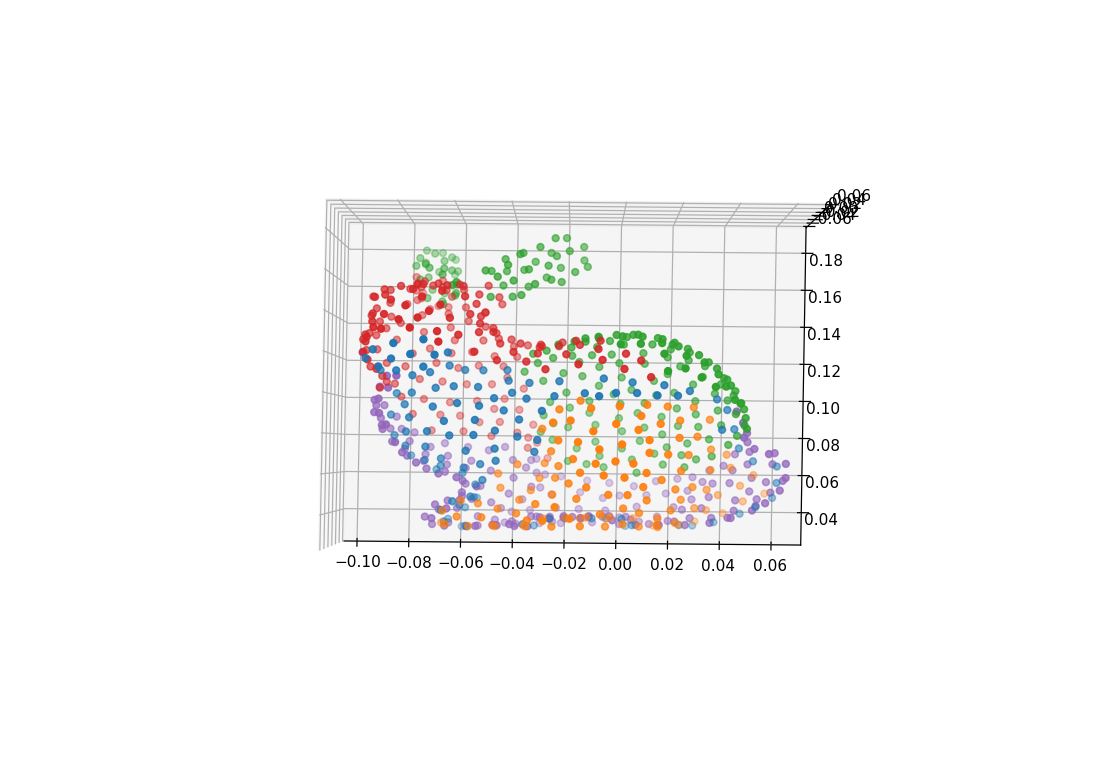

(109, 3)
(113, 3)
(197, 3)
(166, 3)
(182, 3)


In [117]:

sum_ = 0
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

for patch in patches:
    
# Creating plot
    print(patch.shape)
   
    ax.scatter3D(patch[:,0], patch[:,1], patch[:,2])